# Logistic regression

### Outline
1. Logistic regression for binary classification
    - Recall the perceptron
    - Softening the perceptron
    - Sigmoid function
    - Logistic regression model
    - Interpretation using log odds
    - Log loss
2. Logistic regression for multiclass classification
    - Recall soft classification
    - Softmax
    - Multiclass logistic regression
    - Cross-entropy loss
    

## Logistic regression for binary classification

### Setup
As usual, we are given a labelled dataset for binary classification with the following form:
- There are $m$ instances in the dataset. 
- There are $n$ features $X_i$, each corresponding to a column vector $\mathbf{x}_i \in \mathbb{R}^m$. 
- There is a single binary target $Y$ which takes the value $0$ or $1$ for each instance. The target is represented by a column vector $\mathbf{y} \in \{0,1\}^m$.
We write $\vec{x}_i$ for the $i$-th row of the feature matrix $\mathbf{X}$.

### Recall the perceptron
Recall that the perceptron is a linear classifier which picks out a single hyperplane in the feature space $\mathbb{R}^n$ to separate the two classes, i.e. for all instances $\vec{x}$ lying on one side of the hyperplane, the perceptron predicts $0$, and for all instances on the other side, it predicts $1$.

The parameters of the perceptron consist of a weight vector $\vec{w} \in \mathbb{R}^n$ and bias $b \in \mathbb{R}$. The hyperplane dividing the two classes is defined by the equation $\vec{w} \cdot \vec{x} + b = 0$. In the other words, the set of points lying on the hyperplane is:
\begin{equation*}
    \{ \vec{x} \in \mathbb{R}^n \mid \vec{w} \cdot \vec{x} + b = 0 \}.
\end{equation*}
(We saw last time that this is an affine space that is parallel to the subspace of vectors orthogonal to $\vec{w}$.) 

Now, the perceptron $P_{\vec{w},b}$ is defined as:
\begin{equation*}
    P_{\vec{w},b}(\vec{x}) = H(\vec{w} \cdot \vec{x} + b) = 
    \begin{cases}
        1 & \text{if } \; (\vec{w} \cdot \vec{x} + b) > 0, \\
        0 & \text{if } \; (\vec{w} \cdot \vec{x} + b) < 0.
    \end{cases}
\end{equation*}
Recall that the parameters $(\vec{w},b)$ are learned via the perceptron algorithm, which starts by initializing arbitrary weights, and then iteratively updates them by looking at the misclassified instances. The algorithm terminates when all the instances are correctly classified, or after a fixed number of iterations (determined by the user at the beginning). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read in presidential election dataset
df_train = pd.read_csv('../data/classification/presidential_election_binary/train.csv')
df_test = pd.read_csv('../data/classification/presidential_election_binary/test.csv')

In [2]:
df_train.columns

Index(['fips', 'year', 'area_sqmi', 'pop_density', 'income_median',
       'income_percapita', 'pop_male', 'pop_female', 'hispanic', 'labor_total',
       'labor_armed', 'labor_employed', 'labor_unemployed', 'income_poverty',
       'native_yes', 'native_no', 'houses_tot', 'income_10', 'income_10-15',
       'income_15-25', 'income_25', 'marital_single', 'marital_married',
       'marital_sepdiv', 'marital_widow', 'edu_low', 'edu_mid', 'edu_high',
       'edu_low_age_18', 'edu_low_age_45', 'edu_low_age_65', 'edu_mid_age_18',
       'edu_mid_age_45', 'edu_mid_age_65', 'edu_high_age_18',
       'edu_high_age_45', 'edu_high_age_65', 'race_wht_total', 'race_wht_male',
       'race_wht_female', 'race_blk_total', 'race_blk_male', 'race_blk_female',
       'race_other_total', 'race_other_male', 'race_other_female', 'dem',
       'repub', 'target'],
      dtype='object')

In [3]:
import json
# read in the data_description json file as a dictionary
with open('../data/classification/presidential_election_binary/data_description.json') as f:
    data_description = json.load(f)
data_description

{'fips': 'Federal Information Processing Standard (FIPS) county code',
 'year': 'Election year',
 'area_sqmi': 'County area in square miles',
 'pop_density': 'Population density (people per square mile)',
 'income_median': 'Median household income',
 'income_percapita': 'Per capita income',
 'income_poverty': 'Population below poverty line',
 'income_10': 'Population with income below $10,000',
 'income_10-15': 'Population with income between $10,000-$15,000',
 'income_15-25': 'Population with income between $15,000-$25,000',
 'income_25': 'Population with income above $25,000',
 'pop_male': 'Proportion of male population',
 'pop_female': 'Proportion of female population',
 'hispanic': 'Proportion of Hispanic population',
 'labor_total': 'Proportion of working-age population',
 'labor_armed': 'Proportion in armed forces',
 'labor_employed': 'Proportion employed',
 'labor_unemployed': 'Proportion unemployed',
 'native_yes': 'Proportion of native-born citizens',
 'native_no': 'Proportion

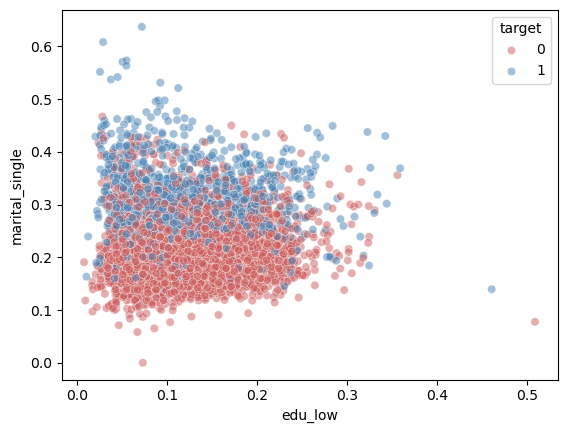

In [5]:
palette = {1: 'steelblue', 0: 'indianred'}
# plot edu_low vs marital_single
sns.scatterplot(x='edu_low', y='marital_single', data=df_train, alpha=0.5, hue='target', palette=palette)
plt.show()

In [6]:
# fit a logistic regression model with edu_low and marital_single as predictors
from sklearn.linear_model import LogisticRegression

X_train = df_train[['edu_low', 'marital_single']]
y_train = df_train['target']
X_test = df_test[['edu_low', 'marital_single']]
y_test = df_test['target']

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

/opt/anaconda3/envs/math392/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


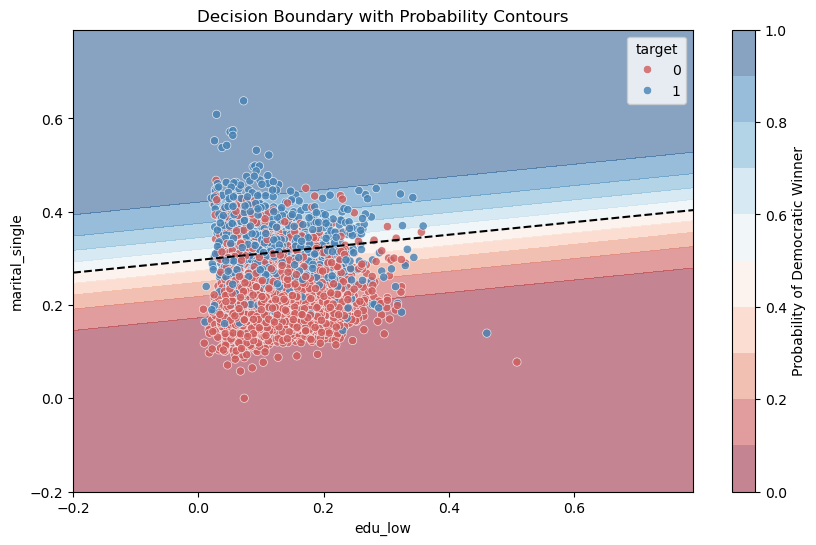

In [13]:
x_min, x_max = -0.2, 0.8
y_min, y_max = -0.2, 0.8
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Get probability of class 1
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, levels=np.linspace(0, 1, 11), cmap='RdBu')
plt.colorbar(label='Probability of Democratic Winner')
# plot the decision boundary as a black dashed line
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--')
sns.scatterplot(x='edu_low', y='marital_single', data=df_train, alpha=0.8, hue='target', palette=palette)
plt.xlabel('edu_low')
plt.ylabel('marital_single')
plt.title('Decision Boundary with Probability Contours')
plt.show()

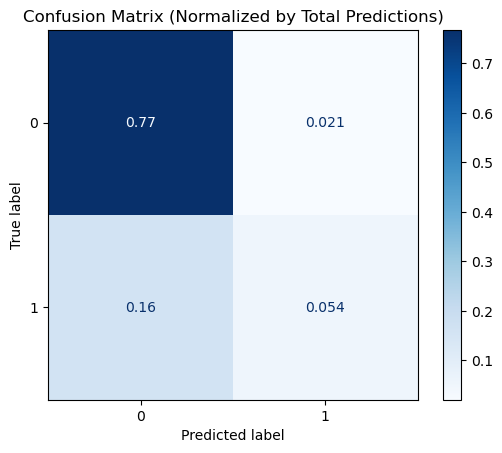

In [15]:
# make predictions on the test set and display the confusion matrix, normalized by total predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Normalized by Total Predictions)')
plt.show()

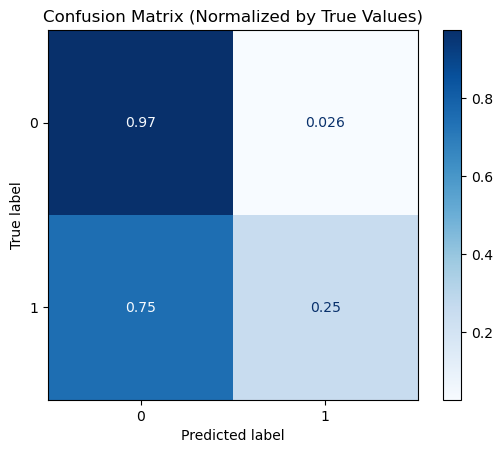

In [16]:
# make predictions on the test set and display the confusion matrix, normalized by true values
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Normalized by True Values)')
plt.show()


In [ ]:
import numpy as np
from scipy import optimize

def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def custom_log_loss(weights, X, dem_percentages):
    """
    Custom log loss function using vote percentages as soft labels
    
    Parameters:
    -----------
    weights : array-like
        Weight vector (including intercept as the last element)
    X : array-like
        Design matrix without intercept term
    dem_percentages : array-like
        Democratic vote percentages (between 0 and 1)
        
    Returns:
    --------
    loss : float
        The weighted log loss value
    """
    # Split weights into coefficients and intercept
    w = weights[:-1]
    b = weights[-1]
    
    # Compute predictions (probabilities)
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    # Avoid numerical instability
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    # Calculate weighted log loss
    loss = -np.mean(dem_percentages * np.log(y_pred) + (1 - dem_percentages) * np.log(1 - y_pred))
    
    return loss

def gradient(weights, X, dem_percentages):
    """
    Gradient of the custom log loss function
    
    Parameters are same as custom_log_loss
    """
    # Split weights into coefficients and intercept
    w = weights[:-1]
    b = weights[-1]
    
    # Get number of samples
    n_samples = X.shape[0]
    
    # Compute predictions
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    # Compute error
    error = y_pred - dem_percentages
    
    # Compute gradients
    grad_w = (1/n_samples) * np.dot(X.T, error) + reg_strength * w
    grad_b = np.mean(error)
    
    # Combine gradients
    return np.append(grad_w, grad_b)

### Softening the Perceptron
The perceptron is a simple and elegant algorithm, but it has some limitations. The main limitation is that if the data is not **linearly separable** (i.e. there is no hyperplane separating the two classes perfectly), then the algorithm will not converge to solution (instead, it will continue until the number of iterations is reached, or the accuracy stops improving with further epochs). 

Note also that the perceptron is a hard classifier, since it outputs only $0$ or $1$. 

It is natural then to try to soften the perceptron into a soft classifier: the output should be a float between $0$ and $1$, with larger values indicating higher probability of being in class $1$, and smaller values indicating higher probability of being in class $0$. Quite intuitively/logically, the output should be exactly $0.5$ when the input is on the hyperplane, indicating that the classifier is uncertain about the class of the input along the hyperplane.

In summary, we want to replace the Heaviside function $H$ with a function $\sigma$ that satisfies the following properties (you should note that we will be applying this with $z = \mathbf{w}^T\mathbf{x} + b$):
- $\sigma(z) \in [0,1]$ for all $z \in \mathbb{R}$.
- $\sigma(z) \to 0$ as $z \to -\infty$.
- $\sigma(z) \to 1$ as $z \to \infty$.
- $\sigma(0) = 0.5$.

The function that satisfies these properties is the **logistic function**:
\begin{equation*}
    \sigma(z) = \frac{1}{1 + e^{-z}}.
\end{equation*}
This function is also called the **sigmoid function**. It is a smooth, continuous function that maps any real number to the interval $[0,1]$. It is also differentiable, which makes it useful for optimization algorithms like gradient descent.